# Analysis of Brownsville API Dataset

In this notebook, I will be analyzing the Brownsville API dataset. This dataset contains information on the buildings which have received complaints in the Brownsville area, compiled by an API created by Alix Leon.<br>
<br>

The first step is to load up the necessary libraries and the BrownsvilleAPI dataset. Data cleaning will be done, which will consist of removing duplicates that may interfere with the data analysis and removing N/A rows if necessary.

In [1]:
#loads libraries necesary to analyze dataset
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
df = pd.read_csv("brownsville.txt", parse_dates=["statusdate"])

#set an option to show full text of each value (helpful for the "statusdescription" column)
pd.set_option('display.max_colwidth', -1)

#set an option to see all columns
pd.set_option('display.max_columns', None)

#showing dataset to make sure it loaded properly
df

<ipython-input-2-9b990639422f>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


,Unnamed: 0,complaintid,buildingid,boroughid,borough,housenumber,streetname,zip,block,lot,apartment,communityboard,receiveddate,status,unittypeid,spacetypeid,typeid,majorcategoryid,minorcategoryid,codeid,statusdate,statusdescription,address,latitude,longitude,bbl,bldgclass,bldgarea,numbldgs,numfloors,unitsres,unitstotal,landuse,ownername,yearbuilt,yearalter1,yearalter2,ownertype,ownertypelong,unittype,spacetype,type,code,majorcategory,minorcategory,statusdescriptionshort
0,0,7419258,314794,3,BROOKLYN,214,HULL STREET,11233,1540,23,3L,16,2015-04-01,CLOSE,92,550,1,59,349,2715,2015-04-06,"The Department of Housing Preservation and Development responded to a complaint of no heat or hot water and was advised by a tenant in the building that heat and hot water had been restored. If the condition still exists, please file a new complaint.",214 HULL STREET,40.679984,-73.907031,3015400023,C1,7600.0,1,4.0,8,8,2.0,"HULL STREET ASSOCIATES , LLC",1910,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),BUILDING-WIDE,BUILDING-WIDE,EMERGENCY,NO HEAT,HEAT/HOT WATER,ENTIRE BUILDING,Single complaint; tenant confirmed resolved
1,1,7419264,311915,3,BROOKLYN,530,HERZL STREET,11212,3620,38,B6,16,2015-04-01,CLOSE,91,543,1,59,348,2713,2015-04-07,"The Department of Housing Preservation and Development contacted an occupant of the apartment and verified that the following conditions were corrected. The complaint has been closed. If the condition still exists, please file a new complaint.",530 HERZL STREET,40.656544,-73.912252,3036200038,C1,40000.0,1,4.0,46,46,2.0,530 HERZL,1930,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,ENTIRE APARTMENT,EMERGENCY,NO HEAT,HEAT/HOT WATER,APARTMENT ONLY,Inspected; no violations issued
2,2,7419438,873260,3,BROOKLYN,2313,PACIFIC STREET,11233,1435,54,1,16,2015-04-01,CLOSE,91,543,1,56,337,2836,2015-04-14,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,2313 PACIFIC STREET,40.675423,-73.908974,3014350054,B1,2130.0,1,3.0,2,2,1.0,"OSOFISAN, OLATUNDE",2005,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,ENTIRE APARTMENT,EMERGENCY,NaN,DOOR/WINDOW,WINDOW FRAME,Inspected; violations issued
3,3,7419438,873260,3,BROOKLYN,2313,PACIFIC STREET,11233,1435,54,1,16,2015-04-01,CLOSE,91,548,3,28,198,1364,2015-04-14,The Department of Housing Preservation and Development inspected the following conditions. No violations were issued. The complaint has been closed.,2313 PACIFIC STREET,40.675423,-73.908974,3014350054,B1,2130.0,1,3.0,2,2,1.0,"OSOFISAN, OLATUNDE",2005,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,OTHER ROOM/AREA,NON EMERGENCY,BULGING/HOLE/CRACKED,PLASTER PAINT/PLASTER,WALLS WALL,Inspected; no violations issued
4,4,7419438,873260,3,BROOKLYN,2313,PACIFIC STREET,11233,1435,54,1,16,2015-04-01,CLOSE,91,547,3,28,198,1364,2015-04-14,The Department of Housing Preservation and Development inspected the following conditions. Violations were issued. Information about specific violations is available at www.nyc.gov/hpd.,2313 PACIFIC STREET,40.675423,-73.908974,3014350054,B1,2130.0,1,3.0,2,2,1.0,"OSOFISAN, OLATUNDE",2005,0,0,NaN,UNKNOWN (USUALLY PRIVATE OWNERSHIP),APARTMENT,LIVING ROOM,NON EMERGENCY,BULGING/HOLE/CRACKED,PLASTER PAINT/PLASTER,WALLS WALL,Inspected; violations issued
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68123,68444,10749151,809296,3,BROOKLYN,214,ROCKAWAY AVENUE,11233,1434,1,8C,16,2021-06-23,OPEN,91,543,3,28,198,2530,2021-06-23,The following complaint conditions are still open. HPD may attempt to contact you to verify the correction of the condition or may conduct an inspection.,214 ROCKAWAY AVENUE,40.675218,-73.911035,3014340001,D6,785336.0,5,23.0,1107,1117,4.0,HP ATLANTIC PLAZA TOWERS HOUSING DEVELOP MENT FUND,1968,0,0,X,FULLY TAX-E

In [3]:
#Drops duplicate values in "complaintid" column
brownsville = df.drop_duplicates(subset=["complaintid"], keep='first', inplace=False)

In [4]:
len(brownsville)

33764

In [5]:
#Checks how many N/A values are in the dataset
brownsville.isna().sum().sum()

32206

In [6]:
#Drops NA values from dataset
#brownsville = brownsville.dropna()

Removing N/A values removes too many rows, more than half, so they will be left in to not mess up the data.

-----------------------

Here, a new column named "complaints" will be created to combine the 'code', 'majorcategory' and 'minorcategory' columns, as having them separated makes them unclear.

In [7]:
#combines "code", majorcategory" and "minorcategory" columns
brownsville["complaints"] = brownsville["code"] + "-" + brownsville["majorcategory"] + "-" + brownsville["minorcategory"]

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [8]:
#checks how the new columns looks
brownsville["complaints"].head()

0     NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING    
1     NO HEAT-HEAT/HOT WATER-APARTMENT ONLY     
2     NaN                                       
12    NaN                                       
16    MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR
Name: complaints, dtype: object

Here, the new categories column will be analyzed to see which is highest in reports.  

In [9]:
#lists unique values by amount, from most to least frequent
brownsville["complaints"].value_counts().head(10)

NO HEAT-HEAT/HOT WATER-APARTMENT ONLY                      5003
NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING                     4816
NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING    2312
NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY     1361
AT WALL OR CEILING-WATER LEAK-HEAVY FLOW                   1197
NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING                1196
NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY                 1119
MICE-UNSANITARY CONDITION-PESTS                            793 
COLLAPSING OR FALLING-PLASTER PAINT/PLASTER-CEILING        661 
MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR                 654 
Name: complaints, dtype: int64

Text(0.5, 0, 'Number of Reports')

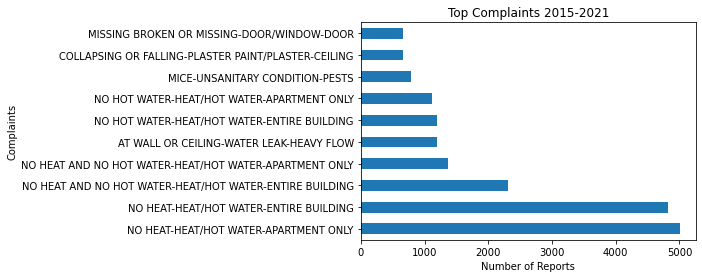

In [10]:
#creating a bar chart to display the top complaints, added .head(10) to shrink results to 10 so it wouldn't be too crowded
com_values = brownsville["complaints"].value_counts().head(10)
com_values.plot(kind = "barh")
plt.title("Top Complaints 2015-2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Reports")

The top complaints found here are:<br>
1. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
2. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
3. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
4. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
5. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
6. NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
7. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
8. MICE-UNSANITARY CONDITION-PESTS<br>
9. COLLAPSING OR FALLING-PLASTER PAINT/PLASTER-CEILING<br> 
10. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
<br>
Looking that these results, it seems that the majority of problems are heat/hot water related, water leaks and pest problems.

------------------

Checking addresses to see which ones are the most frequently shown in the dataset.

In [11]:
brownsville["address"].value_counts().head(10)

7 HEGEMAN AVENUE               850
351 HOWARD AVENUE              547
351 LEGION STREET              423
37 NEW LOTS AVENUE             347
23 NEW LOTS AVENUE             335
1939 PARK PLACE                282
553 HOWARD AVENUE              249
290 RIVERDALE AVENUE           242
2044 BERGEN STREET             209
257 MOTHER GASTON BOULEVARD    205
Name: address, dtype: int64

Text(0.5, 0, 'Number of Reports')

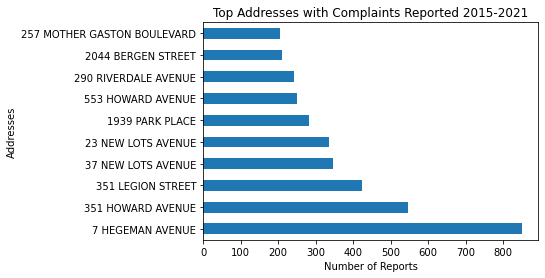

In [12]:
build_values = brownsville["address"].value_counts().head(10)
build_values.plot(kind = "barh")
plt.title("Top Addresses with Complaints Reported 2015-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Reports")

The addresses with the most complaints in this version of the dataset are:<br>
1. 7 Hegeman<br>
2. 351 Howard Avenue<br>
3. 351 Legion Street<br>
4. 37 New Lots Avenue<br>
5. 23 New Lots Avenue<br>
6. 1939 Park Place<br>
7. 553 Howard Avenue<br>
8. 290 Riverdale Avenue<br>
9. 2044 Bergen Avenue<br>
10. 257 Mother Gaston Boulevard<br> 

------------------------------------------

In this section, I will show the top addresses with violations in this timeframe.

In [13]:
bv_address_status = brownsville[["address", "statusdescriptionshort"]]

In [14]:
bv_sd_violation = bv_address_status[(bv_address_status.statusdescriptionshort == 'Inspected; violations issued')]

Text(0.5, 0, 'Number of Violations Reported')

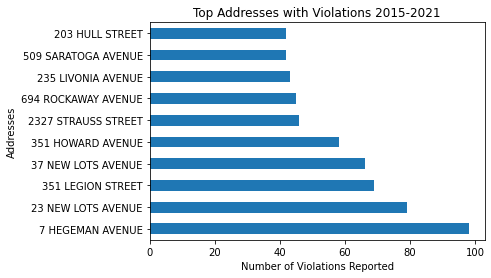

In [15]:
bv_sd_violation_counts = bv_sd_violation["address"].value_counts().head(10)
bv_sd_violation_counts.plot(kind = "barh")
plt.title("Top Addresses with Violations 2015-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Violations Reported")

The top addresses that were issued violations between the years of 2015 and 2021 are:<br>
1. 7 Hegeman Avenue<br>
2. 23 New Lots Avenue<br>
3. 351 Legion Street<br>
4. 37 New Lots Avenue<br>
5. 351 Howard Avenue<br>
6. 2327 Strauss Avenue<br>
7. 694 Rockaway Parkway<br>
8. 235 Livonia Avenue<br>
9. 509 Saratoga Avenue<br>
10. 203 Hull Street<br>

--------------

Checking the top addresses that could not be accessed after complaints were made.

In [16]:
bv_sd_noaccess = bv_address_status[(bv_address_status.statusdescriptionshort == "Unable to gain access")]

Text(0.5, 0, 'Number of Unaccessed Addresses')

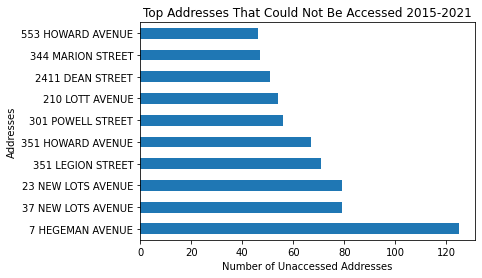

In [17]:
bv_sd_noaccess_counts = bv_sd_noaccess["address"].value_counts().head(10)
bv_sd_noaccess_counts.plot(kind = "barh")
plt.title("Top Addresses That Could Not Be Accessed 2015-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Unaccessed Addresses")

The top addresses that could not be accessed after complaints were made between the years of 2015 and 2021 are:<br>
1. 7 Hegeman Avenue<br>
2. 37 New Lots Avenue<br>
3. 23 New Lots Avenue<br>
4. 351 Legion Street<br>
5. 351 Howard Avenue<br>
6. 301 Powell Street<br>
7. 210 Lott Avenue<br>
8. 2411 Dean Street<br>
9. 344 Marion Street<br>
10. 553 Howard Avenue<br>

-------------------

Here we will look at which complaints are most commonly associated with issued violations. 

In [18]:
bv_complaintstatus = brownsville[["complaints", "statusdescriptionshort"]]

In [19]:
bv_sd_comviolation = bv_complaintstatus[(bv_complaintstatus.statusdescriptionshort == 'Inspected; violations issued')]

Text(0.5, 0, 'Number of Violations Reported')

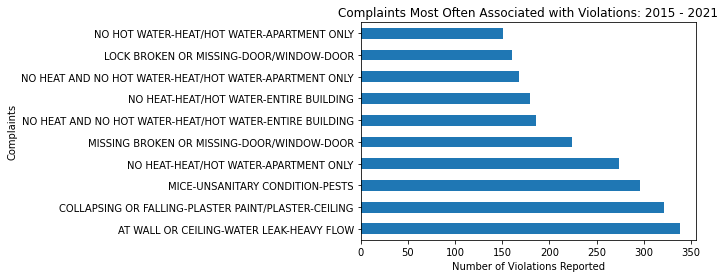

In [20]:
bv_sd_comviolation_counts = bv_sd_comviolation["complaints"].value_counts().head(10)
bv_sd_comviolation_counts.plot(kind = "barh")
plt.title("Complaints Most Often Associated with Violations: 2015 - 2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Violations Reported")

Complaints most associated with violations being issued are:<br>
1. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
2. COLLAPSING OR FALLING-PLASTER PAINT/PLASTER-CEILING<br>
3. MICE-UNSANITARY CONDITION-PESTS<br>
4. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
5. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
6. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
7. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
8. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
9. LOCK BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
10. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
<br>
Many of the violations issued were from problems we also see in the top complaints category as well (heat/hot water issues, pest problems and water leaks), although there is a a different complaint here than before (lock broken or missing).

------------

Here we are taking a look at which complaints are most commonly associated with unaccessed addresses. 

In [21]:
bv_sd_comnoaccess = bv_complaintstatus[(bv_complaintstatus.statusdescriptionshort == 'Unable to gain access')]

Text(0.5, 0, 'Number of Unaccessed Addresses')

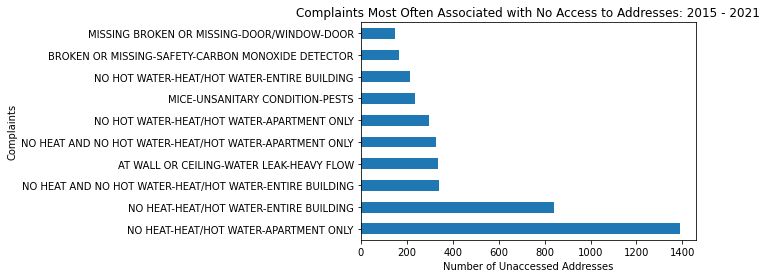

In [22]:
bv_sd_comnoaccess_counts = bv_sd_comnoaccess["complaints"].value_counts().head(10)
bv_sd_comnoaccess_counts.plot(kind = "barh")
plt.title("Complaints Most Often Associated with No Access to Addresses: 2015 - 2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Unaccessed Addresses")

The top complaints associated with addresses not being accessible are:<br>
1. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
2. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br> 
3. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br> 
4. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br> 
5. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br> 
6. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
7. MICE-UNSANITARY CONDITION-PESTS<br> 
8. NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
9. BROKEN OR MISSING-SAFETY-CARBON MONOXIDE DETECTOR<br> 
10. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
<br>
The same complaints come up as before (heat/hot water, water leak, pests), though one of the complaints we see here (broken or missinng safety-safety-carbon monoxide detector) hasn't been seen in the other top lists.

--------------

In this section, the dates need a little tweaking to make it possible to track the amount of complaints made each month of the year in this dataset.

In [23]:
#labeling each month and getting value counts for each
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
brownsville['statusdate'] = pd.to_datetime(brownsville['statusdate'])
brownsville["statusdatemonth"] = brownsville["statusdate"].dt.month
month_counts = brownsville["statusdatemonth"].value_counts()
month_counts.index = month_counts.index.map(month)
month_counts

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


December     4534
January      4281
November     4122
February     3949
March        3205
October      2660
April        2169
August       2048
September    1792
June         1782
May          1663
July         1559
Name: statusdatemonth, dtype: int64

Text(0.5, 0, 'Months of the Year')

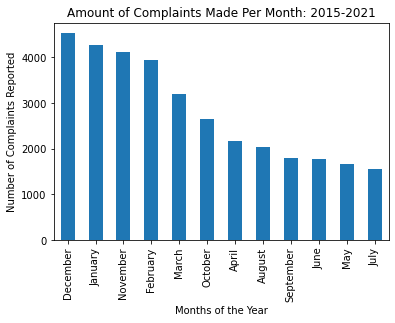

In [24]:
month_counts.plot(kind = "bar")
plt.title("Amount of Complaints Made Per Month: 2015-2021")
plt.ylabel("Number of Complaints Reported")
plt.xlabel("Months of the Year")

In this timeframe, the winter months are the ones in which the most complaints are made. The months, in order, are: <br>
1. December<br>
2. January<br>
3. November<br>
4. February<br>
5. March<br>
6. October<br>
7. April<br>
8. August<br>
9. September<br>
10. June<br>
11. May<br>
12. July<br>

-------

In this first section, we see some paterns forming. Some addresses appear repeatedly in different lists (eg. 7 Hegeman Avenue, 23 New Lots Avenue, 351 Legion Street, etc), complaints arise again and again (heat/hot water problems, unsanitary conditions/pests, water leaks), and most issues seem to occur for the winter season.

--------------------

--------------------------

## Part 2: 5 Year Analysis of Brownsville, years 2016-2021

Here, I filtered the years down to a five year timeframe (between the years 2016 and 2021) to see what differences there are from the full timeframe of the dataset. 

In [25]:
#filters dataset to specified time frame (2016-01-01 to 2021-05-01)
bv_5years = brownsville[(brownsville['statusdate'] > '2016-01-01') & (brownsville['statusdate'] < '2021-05-01')]

-----------------

Here, the complaints column in this five year timeframe will be analyzed to see which has the highest amount of reports.  

In [26]:
bv_5years["complaints"].value_counts().head(10)

NO HEAT-HEAT/HOT WATER-APARTMENT ONLY                      3853
NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING                     3497
NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING    1747
NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY     1040
AT WALL OR CEILING-WATER LEAK-HEAVY FLOW                   882 
NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING                869 
NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY                 864 
MICE-UNSANITARY CONDITION-PESTS                            669 
COLLAPSING OR FALLING-PLASTER PAINT/PLASTER-CEILING        498 
MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR                 495 
Name: complaints, dtype: int64

Text(0.5, 0, 'Number of Reports')

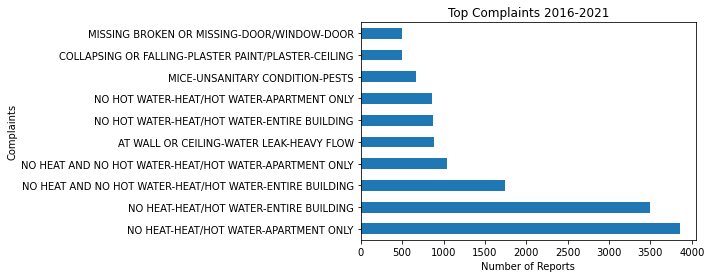

In [27]:
com_values5 = bv_5years["complaints"].value_counts().head(10)
com_values5.plot(kind = "barh")
plt.title("Top Complaints 2016-2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Reports")

The top 5 categories in the Complaints column in the last five years are:<br>

1. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
2. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
3. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
4. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
5. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br> 
6. NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br> 
7. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
8. MICE-UNSANITARY CONDITION-PESTS<br> 
9. COLLAPSING OR FALLING-PLASTER PAINT/PLASTER-CEILING<br> 
10. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
<br>
Top compliants stay consistent with what was seen in the last list, with heat/hot water issues, water leak/heavy flow and mice-unsanitary conditions continue to occupy the top spots.

-------------------

Checking addresses to see which is the most frequently show in the last five years.

In [28]:
bv_5years["address"].value_counts().head(10)

7 HEGEMAN AVENUE               759
351 HOWARD AVENUE              371
23 NEW LOTS AVENUE             322
351 LEGION STREET              321
37 NEW LOTS AVENUE             286
1939 PARK PLACE                220
553 HOWARD AVENUE              193
257 MOTHER GASTON BOULEVARD    192
2044 BERGEN STREET             182
1805 PITKIN AVENUE             176
Name: address, dtype: int64

Text(0.5, 0, 'Number of Reports')

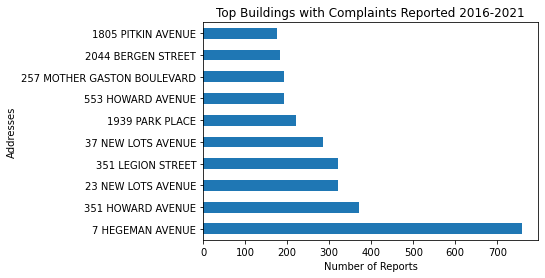

In [29]:
build_values5 = bv_5years["address"].value_counts().head(10)
build_values5.plot(kind = "barh")
plt.title("Top Buildings with Complaints Reported 2016-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Reports")

The addresses with the most complaints in this time frame are:<br>
1. 7 Hegeman Avenue<br>
2. 351 Howard Avenue<br>
3. 23 New Lots Avenue<br>
4. 351 Legion Street<br>
5. 37 New Lots Avenue<br>
6. 1939 Park Place<br>
7. 553 Howard Avenue<br>
8. 257 Mother Gaston Boulevard<br>
9. 2044 Bergen Street<br>
10. 1805 Pitkin Avenue<br>

-------------

In this section, I will show the top addresses with violations in the five year timeframe.

In [30]:
bv_address_status5 = bv_5years[["address", "statusdescriptionshort"]]

In [31]:
bv_sd5 = bv_address_status5[(bv_5years.statusdescriptionshort == 'Inspected; violations issued')]

Text(0.5, 0, 'Number of Violations Reported')

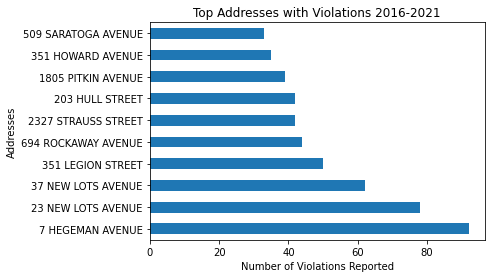

In [32]:
bv_sd_counts5 = bv_sd5["address"].value_counts().head(10)
bv_sd_counts5.plot(kind = "barh")
plt.title("Top Addresses with Violations 2016-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Violations Reported")

The top addresses with code violations between the years of 2016 and 2021 are:<br>
1. 7 Hegeman Avenue<br>
2. 23 New Lots Avenue<br>
3. 37 New Lots Avenue<br>
4. 351 Legion Street<br>
5. 694 Rockaway Avenue<br>
6. 2327 Strauss Street<br>
7. 203 Hull Street<br>
8. 1805 Pitkin Street<br>                            
9. 351 Howard Avenue<br>
10. 509 Saratoga Avenue<br>

------------

Checking the amounts of addresses that could not be accessed after complaints were made for this time frame.

In [33]:
bv_sd_noaccess5 = bv_address_status5[(bv_address_status5.statusdescriptionshort == "Unable to gain access")]

Text(0.5, 0, 'Number of Unaccessed Addresses')

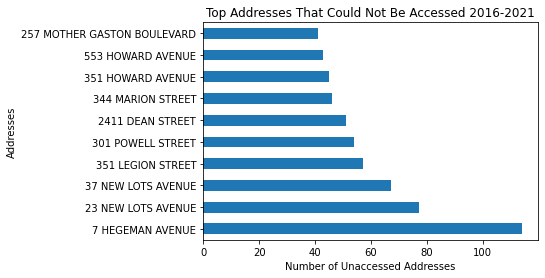

In [34]:
bv_sd_noaccess5_counts = bv_sd_noaccess5["address"].value_counts().head(10)
bv_sd_noaccess5_counts.plot(kind = "barh")
plt.title("Top Addresses That Could Not Be Accessed 2016-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Unaccessed Addresses")

The top addresses that could not be accessed after complaints were made between the years of 2016 and 2021 are:<br>
1. 7 Hegeman Avenue<br>
2. 23 New Lots Avenue<br>
3. 37 New Lots Avenue<br>
4. 351 Legion Street<br>
5. 301 Powell Street<br>
6. 2411 Dean Street<br>
7. 344 Marion Street<br>
8. 351 Howard Avenue<br>                            
9. 553 Howard Avenue<br>
10. 257 Mother Gaston Boulevard<br>

--------------

Here we will look at which complaints are most commonly associated with issued violations for the years of 2016 to 2021. 

In [35]:
bv_complaintstatus5 = bv_5years[["complaints", "statusdescriptionshort"]]

In [36]:
bv_sd_comviolation5 = bv_complaintstatus5[(bv_complaintstatus5.statusdescriptionshort == 'Inspected; violations issued')]

Text(0.5, 0, 'Number of Violations Reported')

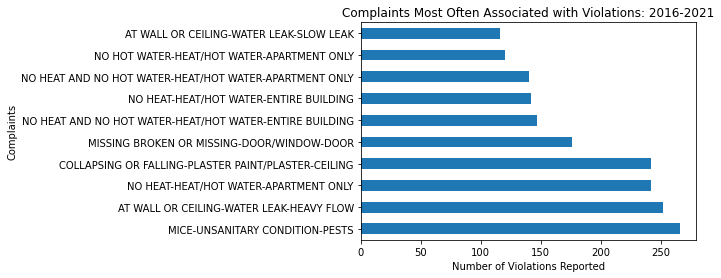

In [37]:
bv_sd_comviolation_counts5 = bv_sd_comviolation5["complaints"].value_counts().head(10)
bv_sd_comviolation_counts5.plot(kind = "barh")
plt.title("Complaints Most Often Associated with Violations: 2016-2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Violations Reported")

Complaints most associated with violations being issued between 2016 - 2021 are:<br>
1. MICE-UNSANITARY CONDITION-PESTS<br>
2. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
3. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
4. COLLAPSING OR FALLING - PLASTER PAINT/PLASTER-CEILING<br>
5. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
6. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
7. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
8. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
9. NO HOT WATER-HEAT/HOT WATER- APARTMENT ONLY<br>
10. AT WALL OR CEILING-WATER LEAK -SLOW LEAK<br>
<br>
We continue to see the same complaints arise for this list, mice-unsanitary condition, no heat/hot water and water leak/heavy flow. Some differences in complaints are for collapsing or falling-plaster paint, missing or broken-door/window and water leak-slow leak.

---------

Here we will look at which complaints are most commonly associated with not being able to access the building for inspection in the years of 2016 to 2021. 

In [38]:
bv_sd_comnoaccess5 = bv_complaintstatus5[(bv_complaintstatus5.statusdescriptionshort == 'Unable to gain access')]

Text(0.5, 0, 'Number of Unaccessed Buildings')

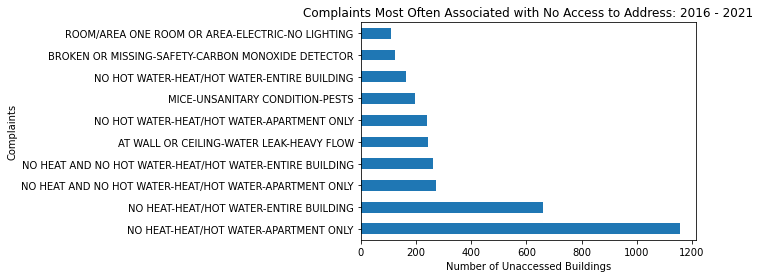

In [39]:
bv_sd_comnoaccess_counts5 = bv_sd_comnoaccess5["complaints"].value_counts().head(10)
bv_sd_comnoaccess_counts5.plot(kind = "barh")
plt.title("Complaints Most Often Associated with No Access to Address: 2016 - 2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Unaccessed Buildings")

The most common complaints associated with not having access to an address for inspection are:<br>
1. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
2. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
3. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
4. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
5. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
6. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
7. MICE-UNSANITARY CONDITION-PESTS<br>
8. NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
9. BROKEN OR MISSING-SAFETY-CARBON MONOXIDE DETECTOR<br>
10. ROOM/AREA ONE ROOM OR AREA-ELECTRIC-NO LIGHTING<br>
<br>
This list is very similar to the last violations/unaccessed address lists. We continue to see no heat/hot water, water leak-heavy flow and unsanitary condition-pests appear. Broken carbon monoxide detectors and electric-no lighting issues are new here. 

-------------

Looking at the amounts of complaints made each month between the years of 2016 to 2021. 

In [40]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
bv_5years['statusdate'] = pd.to_datetime(bv_5years['statusdate'])
bv_5years["statusdatemonth"] = bv_5years["statusdate"].dt.month
month_counts5 = bv_5years["statusdatemonth"].value_counts()
month_counts5.index = month_counts5.index.map(month)
month_counts5

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


January      3542
December     3331
February     3137
November     2932
March        2690
October      1805
April        1712
August       1480
July         1308
September    1247
June         1239
May          1159
Name: statusdatemonth, dtype: int64

Text(0.5, 0, 'Months of the Year')

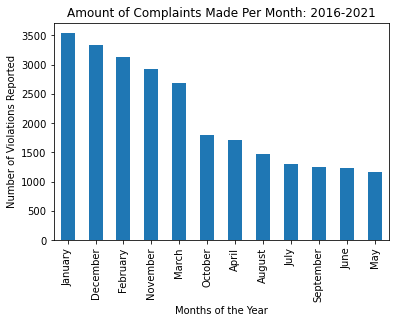

In [41]:
month_counts5.plot(kind = "bar")
plt.title("Amount of Complaints Made Per Month: 2016-2021")
plt.ylabel("Number of Violations Reported")
plt.xlabel("Months of the Year")

As with the overall dataset time frame, the winter months are the ones with the highest amounts of complaints.

---------------

In this five year section, we see the same patterns as before. The top addresses for each list continue to include 7 Hegeman Avenue, 23 New Lots Avenue, 37 New Lots Avenue, 351 Howard Avenue and 351 Legion Street, though these shift around in their spots in the list and different addresses arise. The complaints that we see come up repeatedly in the lists are still no heat/hot water, water leak/heavy flow and unsanitary conditions/pests. The season with the most complaints is still winter.

--------------------

-------------

## Part 3: 2 Year Analysis of Brownsville, years 2019-2021

Filtered the years down to a two year time frame (between the years 2019 and 2021).

In [42]:
bv_2years = brownsville[(brownsville['statusdate'] > '2019-01-01') & (brownsville['statusdate'] < '2021-05-01')]

----------------

Taking a look at the complaints column, now for a two year timeframe.

In [43]:
bv_2years["complaints"].value_counts().head(10)

NO HEAT-HEAT/HOT WATER-APARTMENT ONLY                      1581
NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING                     1347
NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING    787 
NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY     485 
AT WALL OR CEILING-WATER LEAK-HEAVY FLOW                   400 
MICE-UNSANITARY CONDITION-PESTS                            395 
NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING                374 
NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY                 346 
AT WALL OR CEILING-WATER LEAK-SLOW LEAK                    196 
MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR                 181 
Name: complaints, dtype: int64

Text(0.5, 0, 'Number of Reports')

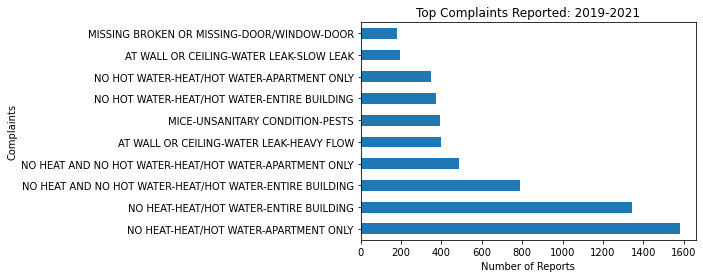

In [44]:
com_values2 = bv_2years["complaints"].value_counts().head(10)
com_values2.plot(kind = "barh")
plt.title("Top Complaints Reported: 2019-2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Reports")

In the complaints column, the top issues in the last two years are:<br>

1. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY<br>
2. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
3. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
4. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
5. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
6. MICE-UNSANITARY CONDITION-PESTS<br>
7. NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
8. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
9. AT WALL OR CEILING-WATER LEAK-SLOW LEAK<br>
10. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
<br>
The paterns continue in this two year time frame that we have seen in the last full and five year time frames. No heat/hot water, water leak/heavy flow and unsanitary condition/pests still pop up. 

---------------------------

Looking at the addresses to see which are the most frequently reported in the last two years.

In [45]:
bv_2years["address"].value_counts().head(10)

7 HEGEMAN AVENUE               411
23 NEW LOTS AVENUE             215
351 HOWARD AVENUE              178
37 NEW LOTS AVENUE             134
553 HOWARD AVENUE              129
351 LEGION STREET              127
290 RIVERDALE AVENUE           109
257 MOTHER GASTON BOULEVARD    102
1805 PITKIN AVENUE             96 
141 HULL STREET                93 
Name: address, dtype: int64

Text(0.5, 0, 'Number of Complaints')

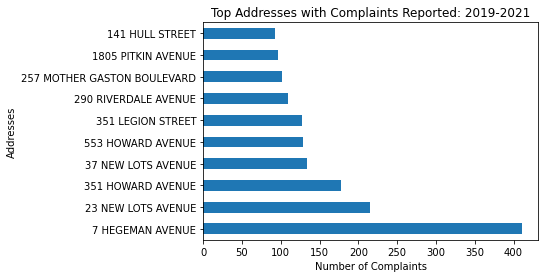

In [46]:
build_values2 = bv_2years["address"].value_counts().head(10)
build_values2.plot(kind = "barh")
plt.title("Top Addresses with Complaints Reported: 2019-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Complaints")

The building with the most complaints in this timeframe are:<br>
1. 7 Hegeman Avenue<br>
2. 23 Lots Avenue<br>
3. 351 Howard Avenue<br>
4. 37 New Lots Avenue<br>
5. 553 Howard Avenue<br>
6. 351 Legion Street<br>
7. 290 Riverdale Avenue<br>
8. 257 Mother Gaston Avenue<br>
9. 1805 Pitkin Avenue<br>
10. 141 Hull Street<br>

------------------

In this section, we'll take a look at the addresses with the most violations in the two year timeframe.

In [47]:
bv_address_status2 = bv_2years[["address", "statusdescriptionshort"]]

In [48]:
bv_sd2 = bv_address_status2[(bv_2years.statusdescriptionshort == 'Inspected; violations issued')]

Text(0.5, 0, 'Number of Violations Reported')

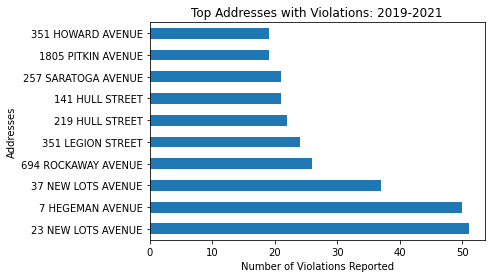

In [49]:
bv_sd_counts2 = bv_sd2["address"].value_counts().head(10)
bv_sd_counts2.plot(kind = "barh")
plt.title("Top Addresses with Violations: 2019-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Violations Reported")

The top buildings with code violations between the years of 2019 and 2021 are:<br>
1. 23 New Lots Avenue<br>
2. 7 Hegeman Avenue<br>
3. 37 New Lots Avenue<br>
4. 694 Rockaway Avenue<br>
5. 351 Legion Street<br>
6. 219 Hull Street<br>
7. 141 Hull Street<br>
8. 257 Saratoga Avenue<br>
9. 1805 Pitkin Avenue<br>
10. 351 Howard Avenue<br>

---------------------

Looking at the addresses that could not be accessed after complaints were received.

In [50]:
bv_sd_noaccess2 = bv_address_status2[(bv_address_status2.statusdescriptionshort == "Unable to gain access")]

Text(0.5, 0, 'Number of Unaccessed Addresses')

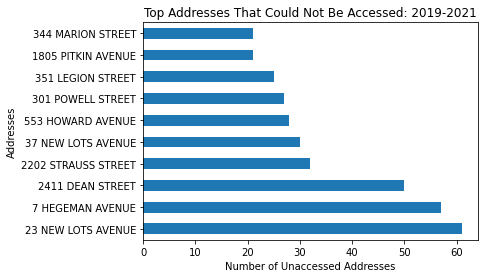

In [59]:
bv_sd_noaccess2_counts = bv_sd_noaccess2["address"].value_counts().head(10)
bv_sd_noaccess2_counts.plot(kind = "barh")
plt.title("Top Addresses That Could Not Be Accessed: 2019-2021")
plt.ylabel("Addresses")
plt.xlabel("Number of Unaccessed Addresses")

The top addresses that could not be accessed after complaints were made between the years of 2019 and 2021 are:<br>

1. 23 New Lots Avenue<br>
2. 7 Hegeman Avenue<br>
3. 2411 Dean Street<br>
4. 2202 Strauss Street<br>
5. 37 New Lots Avenue<br>
6. 553 Howard Avenue<br>
7. 301 Powell Street<br>
8. 351 Legion Street<br>
9. 1805 Pitkin Avenue<br>
10. 344 Marion Street<br>

---------

Here we will look at which complaints are most commonly associated with issued violations within the last two years. 

In [52]:
bv_complaintstatus2 = bv_2years[["complaints", "statusdescriptionshort"]]

In [53]:
bv_sd_comviolation2 = bv_complaintstatus2[(bv_complaintstatus2.statusdescriptionshort == 'Inspected; violations issued')]

Text(0.5, 0, 'Number of Violations Reported')

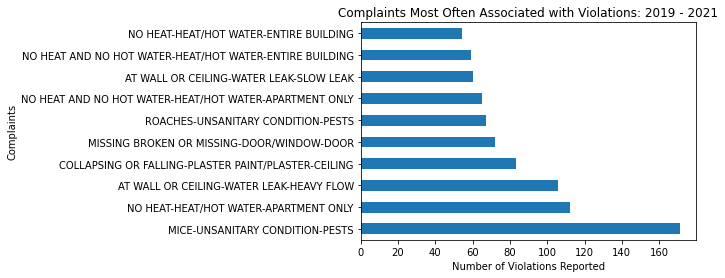

In [54]:
bv_sd_comviolation_counts2 = bv_sd_comviolation2["complaints"].value_counts().head(10)
bv_sd_comviolation_counts2.plot(kind = "barh")
plt.title("Complaints Most Often Associated with Violations: 2019 - 2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Violations Reported")

The most common complaints which lead to a violation being issued are:<br>

1. MICE-UNSANITARY CONDITION-PESTS<br>
2. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY <br>
3. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
4. COLLAPSING OR FALLING-PLASTER PAINT/PLASTER-CEILING<br>
5. MISSING BROKEN OR MISSING-DOOR/WINDOW-DOOR<br>
6. ROACHES-UNSANITARY CONDITION-PESTS<br>
7. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
8. AT WALL OR CEILING-WATER LEAK-SLOW LEAK<br>
9. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
10. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING<br>
<br>
The complaints continue to repeat on the list, the only difference here is the report of roaches/unsanitary conditions/pests.

-------

Here we will look at which complaints are most commonly associated with not having access to the building for inspection in the two year time frame. 

In [55]:
bv_sd_comnoaccess2 = bv_complaintstatus2[(bv_complaintstatus2.statusdescriptionshort == 'Unable to gain access')]

Text(0.5, 0, 'Number of Unaccessed Buildings')

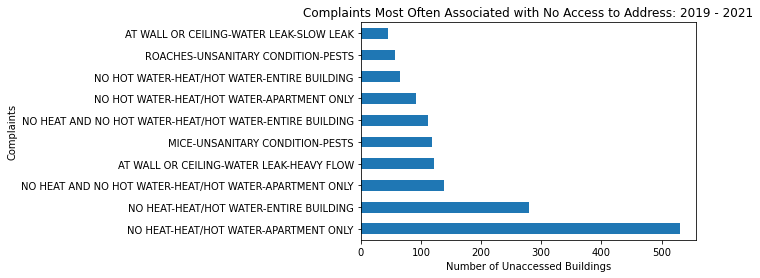

In [60]:
bv_sd_comnoaccess_counts2 = bv_sd_comnoaccess2["complaints"].value_counts().head(10)
bv_sd_comnoaccess_counts2.plot(kind = "barh")
plt.title("Complaints Most Often Associated with No Access to Address: 2019 - 2021")
plt.ylabel("Complaints")
plt.xlabel("Number of Unaccessed Buildings")

The most common complaints associated with an address being inaccessible are:<br>


1. NO HEAT-HEAT/HOT WATER-APARTMENT ONLY <br>
2. NO HEAT-HEAT/HOT WATER-ENTIRE BUILDING <br>
3. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
4. AT WALL OR CEILING-WATER LEAK-HEAVY FLOW<br>
5. MICE-UNSANITARY CONDITION-PESTS<br>
6. NO HEAT AND NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
7. NO HOT WATER-HEAT/HOT WATER-APARTMENT ONLY<br>
8. NO HOT WATER-HEAT/HOT WATER-ENTIRE BUILDING<br>
9. ROACHES-UNSANITARY CONDITION-PESTS<br>
10. AT WALL OR CEILING-WATER LEAK-SLOW LEAK<br>
<br>
We see the exact same complaints here as with the violations issued list, though they have shifted in order.

----------------

Looking at the amounts of complaints made per month. 

In [57]:
month = {
    1: "January", 
    2: "February", 
    3: "March", 
    4: "April", 
    5: "May", 
    6: "June", 
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December"
}
bv_2years['statusdate'] = pd.to_datetime(bv_2years['statusdate'])
bv_2years["statusdatemonth"] = bv_2years["statusdate"].dt.month
month_counts2 = bv_2years["statusdatemonth"].value_counts()
month_counts2.index = month_counts2.index.map(month)
month_counts2

C:\Users\miss_\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


January      1668
February     1479
December     1397
March        1163
November     1124
April        748 
October      607 
August       558 
July         549 
June         529 
September    476 
May          419 
Name: statusdatemonth, dtype: int64

Text(0.5, 0, 'Months of the Year')

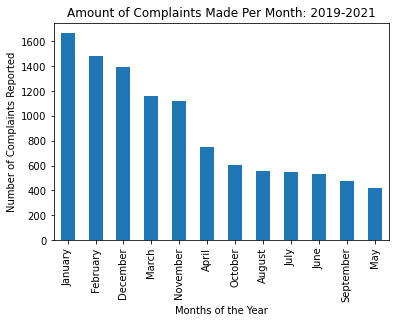

In [58]:
month_counts2.plot(kind = "bar")
plt.title("Amount of Complaints Made Per Month: 2019-2021")
plt.ylabel("Number of Complaints Reported")
plt.xlabel("Months of the Year")

Consistent with what has been shown in the rest of the analysis, the winter months are the ones with the most complaints.

----------------

In the two year time frame, we see some changes in the paterns of the last time frames, although they aren't significant. We see some different addresses come up here, but we still see the same set of them come up (7 Hegeman, 32 New Lots Avenue, 351 Legion Street, etc.). Top complaints reported, with issued violations or associated to innaccessed buildings continue to be no heat/hot water, water leak/heavy flow and mice-unsanitary condition-pests. Winter continues to be the season with the most complaints reported.

-------------------

-----------------

Throughout this analysis, we see paterns arise and continue to appear: the same addresses, complaints and seasons. <br>
<br>
The addresses that repeat the most are:<br>
- 7 Hegeman Avenue<br>
- 351 Howard Avenue<br>
- 351 Legion Street<br>
- 37 New Lots Avenue<br>
- 23 New Lots Avenue<br>
<br>
The most frequent complaints reported, with issued violations and inspections unable to be completed due to lack of access associated with them are:<br>
- No heat/hot water issues<br>
- Mice-unsanitary condition<br>
- Water leak-heavy flow<br>
<br>
The season with the most complaints reported in all 3 time frames is winter.